
# Project: Profitability Analysis - Investigating the Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we'll analyze movie profitability in terms of multiple variables such as genres and revenue. The idea is to have an understanding of what makes a movie profitable. Is it high budgets? A specific genre? That's what we'll discover in this project.


### Dataset Description 

> We'll be working with the TMDb movie data from Kaggle which stores over 4,000 movies to analyze. The dataset contains 10,866 rows and is broken down by the following 12 columns each with their significance to our analysis:

id                       (non-important)          
imdb_id                  (non-important)           
popularity               (non-important)           
budget                   (essential)         
revenue                  (essential)          
original_title           (sub-essential)          
cast                     (sub-essential)          
homepage                 (non-important)       
director                 (sub-essential)        
tagline                  (non-important)        
keywords                 (non-important)          
overview                 (non-important)         
runtime                  (non-important)          
genres                   (essential)                
production_companies     (essential)              
release_date             (non-important)          
vote_count               (non-important)          
vote_average             (non-important)            
release_year             (essential)                  
budget_adj               (non-important)               
revenue_adj              (non-important)               


### Question(s) for Analysis
> I have the following questions that I would like to answer by analyzing this dataset:
1. How is profit viewed through the lenses of Genre and Production Companies?
2. What about revenue and budget relationsips in regards to Genre and Production Companies?

    
The dependent variables are **'profit'** ('revenue' - 'budget') and **'budget'** while the independent variables are **'genres'**, **'production_companies'**, **'revenue'**. Although these questions will be the main focus, there might be supplementary analyses around these questions.

In [2]:
# importing necessary packages for proper investigation and analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
# Upgrade seaborn to use seaborn.relplot() function. 
!pip install --upgrade seaborn==0.9.0

Requirement already up-to-date: seaborn==0.9.0 in /opt/conda/lib/python3.6/site-packages (0.9.0)


<a id='wrangling'></a>
## Data Wrangling


### Reviewing General Properties of the Dataframe - Part 1 of Data Wrangling
> We'll first load the data and then inspect data types, valuable columns and look for instances of missing or possibly errant data.

### Step 1 - Load CSV file, review first lines of dataframe and overall statistics

In [3]:
df_movie = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**review after output(s) (rao)**: Data was correctly parsed with comma so columns are representing appropiate values.

In [5]:
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**review after output(s) (rao)**: Currently, the statistics are not helpful for our profitability analysis. We can use this code again once we have wrangled the data properly.

### Step 2 - Review data type and dimensions

In [6]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**rao**: Dataframe contains a mix of strings, ints and floats which, as of this step, make sense based on the values. However, we might need to eliminate some columns altogether that are irrelevant to our analysis but we'll do this in the cleaning process.

In [7]:
df_movie.shape

(10866, 21)

**rao**: Although we can gather the number of rows and columns from the info method, shape is a more efficient method.

### Step 3 - Missing Data

In [8]:
df_movie.isnull().sum()
#isna can be used alternatively

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**rao**: By identifying all the nulls in each column we can assess the missing data accordingly. Lots of null values but we'll mostly focus only on the fields that will be used in the analysis. Probably replace them with "No data available" or remove the rows altogether.

### Step 4 - Review duplicates

We'll look for identical records using the 'id' column since that is the primary key/unique value in the dataset:

In [9]:
df_movie['id'].duplicated().sum()

1

In [10]:
#Identify the one duplicate

df_movie[df_movie['id'].duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


**raos**: We first coded the dataframe to provide a sum of all duplicate records and then identified such record. Since there is only one duplicate row in the whole set, we can easily exclude it in the next process.


### Data Cleaning - Part 2 of Data Wrangling
> After reviewieng the properties of the dataframe and identifying potential problems in Steps 1-4, we'll now solve and clean them. The idea is to clean the data with the most appropiate methods. Steps 5, 6 and 7 will focus on how to remove unnecessary columns, clean duplicates and missing data.

### Step 5 - Remove unnecessary columns

As mentioned in Step 2, we probably don't need all columns. Since we are focusing mostly on the monetary value that movies are bringing as per the analysis questions chosen, we can disregard miscellaneous fields such as id, homepage, popularity, vote_count, overview, keywords, etc.

We'll also remove revenue_adj and budget_adj because even though they take into consideration inflation for 2010, we are in 2022 so that data is outdated so it is best to use the absolute value of the dollar.

Hence, the following columns will be used; each with its own insight impact level. *High* = necessary for insights and visualizations, *Mid* = adds additional insights and visualization opportunities, *Low* = useful for table view details but insignificant for visualizations:
    - budget (high)
    - revenue (high)
    - original_title (low)
    - cast (low)
    - tagline (low)
    - genres (high)
    - production_companies (high)
    - release_year (mid)

In [11]:
df_movie.drop(['id', 'director', 'imdb_id', 'popularity', 'homepage', 'keywords', 'overview', 'release_date', 'vote_count', 'runtime', 'vote_average', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)

In [12]:
# to check new dataset
df_movie.head(2)

,budget,revenue,original_title,cast,tagline,genres,production_companies,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,What a Lovely Day.,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015


**rao**: Out of the 21 columns, we've chosen to keep only 8 which will make the dataset easier to navigate.

### Step 6 - Remove duplicates

As per Step 4, cleaning the duplicate data will be easy - we need to remove the one duplicate as per the code below:

In [13]:
df_movie.drop_duplicates(inplace = True) 
#inplace needs to be explicitly stated in order to affect the current df rather than a copy

In [14]:
df_movie.duplicated().sum()

0

**raos**: We first removed the duplicate record and then confirmed it was actually removed by looking if we still have duplicate records. In this case, the last output should show 0.

### Step 7 - Remove missing data

Last but not least, is the step of removing/cleaning missing data. We'll break it into three sections:
    - Reviewing the dependent/indepedent variables selected in the "Question(s) for Analysis" sub-section
    - Reviewing variables/fields not selected for our analysis
    - Cleaning the data

#### Reviewing missing data from variables selected for our analysis

The most evident cleaning challenge will be dealing with the missing values in the variables that we'll analyze. For example, 'production_companies' contain a large amount of nulls that may impact our insights process (as shown in Step 3).

Although 'genres' also contains missing values, it can easily be removed since its numbers are minimal. Since these are categorical values rather than numerical we cannot filled them with an average strategy either.

However, before we make any cleaning, we will calculate the percentage of missing data based on each field. This will accurately measure the proportion of missing data that affects the dataset:

In [15]:
pc_prop = round((1030/10866) * 100, 1)
g_prop = round((23/10866) * 100, 1)
print("Proportion of missing data for 'production_companies': {}%\nProportion of missing data for 'genres': {}%".format(pc_prop, g_prop))

Proportion of missing data for 'production_companies': 9.5%
Proportion of missing data for 'genres': 0.2%


We will also identify the number of missing values in 'production_companies' that appear in rows that contain values in the 'genres' field:

In [16]:
# Creating filters that meet the conditions stated in the text above
gfilter = df_movie['genres'].notnull() & df_movie['production_companies'].isnull()

In [17]:
print('Missing values in production_companies field that affects rows with genres data: {}'.format(gfilter.sum()))

Missing values in production_companies field that affects rows with genres data: 1016


**raos**: We can see that the initial assessment of the production companies' missing data being large is verified when looking at the proportional impact it has on the dataset as a whole. Even though the missing data from 'genres' is insignificant and can be removed accordingly, 'production_companies' affects almost 10%. 

The last output highlights that removing records with 'production_companies' missing data will greatly decrease the insight impact of the other independent variable selected for our analysis.

Hence, we'll include missing data from 'production_companies' as "No data available" values in order to provide a robust analysis since there are records that have genre and director data with no production company.


#### Cleaning missing data from variables not selected for our analysis

Any fields that we are not analyzing, we'll replace the null values with "No data available" to match the cleaning we'll do for the missing values in 'production_companies'.

#### Cleaning the data

After our observations made in the previous two sections, we'll remove the records with no genre data:

In [18]:
df_movie.dropna(subset = ['genres'], inplace = True)

The remaining missing data will now be replaced with "No data available":

In [19]:
df_movie.fillna('No data available', inplace = True)

Finally, we review if the changes we've made have been applied to our dataframe:

In [20]:
df_movie.isnull().sum()

budget                  0
revenue                 0
original_title          0
cast                    0
tagline                 0
genres                  0
production_companies    0
release_year            0
dtype: int64

**raos**: We originally had multiple columns that contained missing data but now we have either removed records or filled null values with appropiate values.

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we have completed the data wrangling process of TMDb by reviewing and cleaning the information, we can dive into the exploratory analysis and investigate the two questions posted in the Introduction component of this notebook.

    - How is profit viewed through the lenses of Genre and Production Companies?
    - What about revenue and budget relationsips in regards to Genre and Production Companies?
    
We'll create charts based on these questions but before we can answer them, we'll create a new variable to define profitability accurately.

#### Creating a new quantitative metric - Profit

The best way to calculate profit is to create a new column called 'profit' with the following code:

In [21]:
df_movie['profit'] = df_movie['revenue'] - df_movie['budget']

In [22]:
df_movie.head(2)

,budget,revenue,original_title,cast,tagline,genres,production_companies,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,What a Lovely Day.,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,228436354


### How is profit viewed through the lenses of Genre and Production Companies?

From this new column created, we can now identify profit through genre and production company:

#### Genre

We'll first make a quick sum analysis on the numerical values by genres:

In [23]:
df_movie.groupby(df_movie['genres'])['budget', 'revenue', 'profit'].sum()

,budget,revenue,profit
genres,,,
Action,1352756269,2331375459,978619190
Action|Adventure,346500000,484253103,137753103
Action|Adventure|Animation,0,0,0
Action|Adventure|Animation|Comedy|Drama,0,16627188,16627188
Action|Adventure|Animation|Comedy|Family,0,0,0
Action|Adventure|Animation|Drama|Family,0,0,0
Action|Adventure|Animation|Family,0,0,0
Action|Adventure|Animation|Family|Fantasy,130000000,554987477,424987477
Action|Adventure|Animation|Family|Mystery,0,0,0


**rao**: We'll proceed to do two sub-cleaning steps: 
    - The 'genres' include multiple genres when we're looking to have values by a singular genre 
    - 'budget' and 'revenue' have multiple 0 values which are best to investigate after cleaning the genres

We will divide the values by the number of genres available for each record. We'll first create a custom function to have the genre count column.

In [24]:
def genre_count(field_value):
### counts number of genres in the genres column based on the | character ###
    genre_count = 1
    for char in field_value:
        if char == "|":
            genre_count = genre_count + 1
        else:
            genre_count
    return genre_count

In [25]:
#test the function
genre_count("Action|Adventure|Science Fiction|Thriller")

4

In [26]:
# Using lambda expressions to appply our custom function across all records appropiately:
df_movie['genre_count'] = df_movie['genres'].apply(lambda x: genre_count(x))

In [27]:
# Create new columns to display budget, revenue and profit proportionate to the number of genres
df_movie['genre_profit'] = df_movie['profit'] / df_movie['genre_count']
df_movie['genre_rev'] = df_movie['revenue'] / df_movie['genre_count']
df_movie['genre_budget'] = df_movie['budget'] / df_movie['genre_count']

In [28]:
df_movie.head(5)

,budget,revenue,original_title,cast,tagline,genres,production_companies,release_year,profit,genre_count,genre_profit,genre_rev,genre_budget
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1363528810,4,3.408822e+08,3.783822e+08,3.750000e+07
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,What a Lovely Day.,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,228436354,4,5.710909e+07,9.460909e+07,3.750000e+07
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,One Choice Can Destroy You,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,185238201,3,6.174607e+07,9.841273e+07,3.666667e+07
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Every generation has a story.,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1868178225,4,4.670446e+08,5.170446e+08,5.000000e+07
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Vengeance Hits Home,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1316249360,3,4.387498e+08,5.020831e+08,6.333333e+07


**raos**: By breaking down total profit of a movie to the exact distribution between the genres, we can now accurately assess genre profitability.

In order to showcase profit by each genre we'll create a genre sub-dataset with duplicate records if they contain more than one genre using the explode method:

In [29]:
df_genre = df_movie.assign(genres = df_movie['genres'].str.split('|')).explode('genres')

In [30]:
df_genre.head(4)

,budget,revenue,original_title,cast,tagline,genres,production_companies,release_year,profit,genre_count,genre_profit,genre_rev,genre_budget
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Action,Universal Studios|Amblin Entertainment|Legenda...,2015,1363528810,4,340882202.5,378382202.5,37500000.0
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015,1363528810,4,340882202.5,378382202.5,37500000.0
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015,1363528810,4,340882202.5,378382202.5,37500000.0
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1363528810,4,340882202.5,378382202.5,37500000.0


In [31]:
df_genre.rename(columns = {'genres': 'genre'}, inplace = True)

**raos**: Since we've the genres break down as its own genre record, we also renamed the 'genres' column to 'genre' instead for better column description.

We'll run the genre sum summary again:

In [32]:
df_genre.groupby(df_genre['genre'])['genre_rev', 'genre_budget', 'genre_profit'].sum().sort_values(by = 'genre_profit', ascending = False)

,genre_rev,genre_budget,genre_profit
genre,,,
Comedy,6.119015e+10,2.137870e+10,3.981146e+10
Drama,5.689218e+10,2.298499e+10,3.390719e+10
Action,5.462667e+10,2.087949e+10,3.374718e+10
Adventure,4.958360e+10,1.632639e+10,3.325721e+10
Thriller,3.865093e+10,1.607904e+10,2.257189e+10
Family,2.740010e+10,8.824875e+09,1.857523e+10
Fantasy,2.608452e+10,8.770879e+09,1.731364e+10
Science Fiction,2.583646e+10,9.343842e+09,1.649261e+10
Romance,2.245078e+10,7.719749e+09,1.473103e+10


**rao**: The genre distribution is now cleaner. Comedy is the most profitable genre with Drama and Action coming in closely as second and third.

Even though we'll use these numerical values in our graphs, we'll also create 3 extra column based on these large numbers to improve readibility. We'll do this by creating a custom function:

In [33]:
def num_abr(num):
### Converts million or billion numbers into abbreviated currency strings ###
#inspired from https://www.adamsmith.haus/python/answers/how-to-format-currency-in-python
    if num <= 999999999:
        x = num / 1000000
        return "${:.1f}M".format(x)
    else:
        y = num / 1000000000
        return "${:.2f}B".format(y)

In [34]:
# testing the function
print(num_abr(10055500000))
print(num_abr(55500000))

$10.06B
$55.5M


In [35]:
# Using lambda expressions to apply our custom format function across all records appropiately:
df_genre['genre_profitv2'] = df_genre['genre_profit'].apply(lambda x: num_abr(x))
df_genre['genre_rev_v2'] = df_genre['genre_rev'].apply(lambda x: num_abr(x))
df_genre['genre_budgetv2'] = df_genre['genre_budget'].apply(lambda x: num_abr(x))

In [36]:
df_genre.head(5)

,budget,revenue,original_title,cast,tagline,genre,production_companies,release_year,profit,genre_count,genre_profit,genre_rev,genre_budget,genre_profitv2,genre_rev_v2,genre_budgetv2
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Action,Universal Studios|Amblin Entertainment|Legenda...,2015,1363528810,4,340882202.5,378382202.5,37500000.0,$340.9M,$378.4M,$37.5M
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015,1363528810,4,340882202.5,378382202.5,37500000.0,$340.9M,$378.4M,$37.5M
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015,1363528810,4,340882202.5,378382202.5,37500000.0,$340.9M,$378.4M,$37.5M
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1363528810,4,340882202.5,378382202.5,37500000.0,$340.9M,$378.4M,$37.5M
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,What a Lovely Day.,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015,228436354,4,57109088.5,94609088.5,37500000.0,$57.1M,$94.6M,$37.5M


**raos**: By creating a custom function that converts long numbers into readable text strings, we were then able to apply it to all values in the profit/budget/revenue columns hence providing an easier view of the amounts. We'll use this function again in the upcoming charts for labelling purposes.

Since we now prepared the genre profitibility analysis accordingly, we can create the following charts: 

##### Genre Total Profiitability Bar Chart 

Using the genre summary above, we'll create a specific dataframe for our chart:

In [37]:
# df to start our bar chart
df_gprofit = df_genre.groupby(df_genre['genre'], as_index = False)['genre_rev', 'genre_budget', 'genre_profit'].sum().sort_values(by = ['genre_profit'], ascending = False).reset_index(drop =True)

In [38]:
# running the same cell fixes the Key Error
df_gprofit = df_genre.groupby(df_genre['genre'], as_index = False)['genre_rev', 'genre_budget', 'genre_profit'].sum().sort_values(by = ['genre_profit'], ascending = False).reset_index(drop =True)

In [39]:
#use the custom function num_abr to display the values easier
df_gprofit['genre_profit_v2'] = df_gprofit['genre_profit'].apply(lambda x: num_abr(x))
df_gprofit['genre_rev_v2'] = df_gprofit['genre_rev'].apply(lambda x: num_abr(x))
df_gprofit['genre_budgetv2'] = df_gprofit['genre_budget'].apply(lambda x: num_abr(x))

In [40]:
df_gprofit.head(10)

,genre,genre_rev,genre_budget,genre_profit,genre_profit_v2,genre_rev_v2,genre_budgetv2
0,Comedy,6.119015e+10,2.137870e+10,3.981146e+10,$39.81B,$61.19B,$21.38B
1,Drama,5.689218e+10,2.298499e+10,3.390719e+10,$33.91B,$56.89B,$22.98B
2,Action,5.462667e+10,2.087949e+10,3.374718e+10,$33.75B,$54.63B,$20.88B
3,Adventure,4.958360e+10,1.632639e+10,3.325721e+10,$33.26B,$49.58B,$16.33B
4,Thriller,3.865093e+10,1.607904e+10,2.257189e+10,$22.57B,$38.65B,$16.08B
5,Family,2.740010e+10,8.824875e+09,1.857523e+10,$18.58B,$27.40B,$8.82B
6,Fantasy,2.608452e+10,8.770879e+09,1.731364e+10,$17.31B,$26.08B,$8.77B
7,Science Fiction,2.583646e+10,9.343842e+09,1.649261e+10,$16.49B,$25.84B,$9.34B
8,Romance,2.245078e+10,7.719749e+09,1.473103e+10,$14.73B,$22.45B,$7.72B
9,Animation,1.608350e+10,4.979923e+09,1.110358e+10,$11.10B,$16.08B,$4.98B


In [41]:
#filtering dataframe to only top 10
bar_filter = df_gprofit[df_gprofit['genre'].isin(['Comedy', 'Drama', 'Action', 'Adventure', 'Thriller', 'Family', 'Fantasy', 'Science Fiction', 'Romance', 'Animation'])]

In [42]:
bar_filter

,genre,genre_rev,genre_budget,genre_profit,genre_profit_v2,genre_rev_v2,genre_budgetv2
0,Comedy,6.119015e+10,2.137870e+10,3.981146e+10,$39.81B,$61.19B,$21.38B
1,Drama,5.689218e+10,2.298499e+10,3.390719e+10,$33.91B,$56.89B,$22.98B
2,Action,5.462667e+10,2.087949e+10,3.374718e+10,$33.75B,$54.63B,$20.88B
3,Adventure,4.958360e+10,1.632639e+10,3.325721e+10,$33.26B,$49.58B,$16.33B
4,Thriller,3.865093e+10,1.607904e+10,2.257189e+10,$22.57B,$38.65B,$16.08B
5,Family,2.740010e+10,8.824875e+09,1.857523e+10,$18.58B,$27.40B,$8.82B
6,Fantasy,2.608452e+10,8.770879e+09,1.731364e+10,$17.31B,$26.08B,$8.77B
7,Science Fiction,2.583646e+10,9.343842e+09,1.649261e+10,$16.49B,$25.84B,$9.34B
8,Romance,2.245078e+10,7.719749e+09,1.473103e+10,$14.73B,$22.45B,$7.72B
9,Animation,1.608350e+10,4.979923e+09,1.110358e+10,$11.10B,$16.08B,$4.98B


**raos**: We first created a sum summary for each genre dataset. From there, we filtered to showcase only the top 10 Genres.

In order to display the the abbreviated profit values in our chart, we'll also create a custom function:

In [43]:
def addlabels(x,y,z):
### Takes string value and places it on the numerical value position in the chart ###
# using code understanding from https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
    for i in range(len(x)):
        plt.text(i,y[i],z[i], ha = 'center')

**rao**: With the custom function built, we can now jump into visualizing the Top 10 Genres:

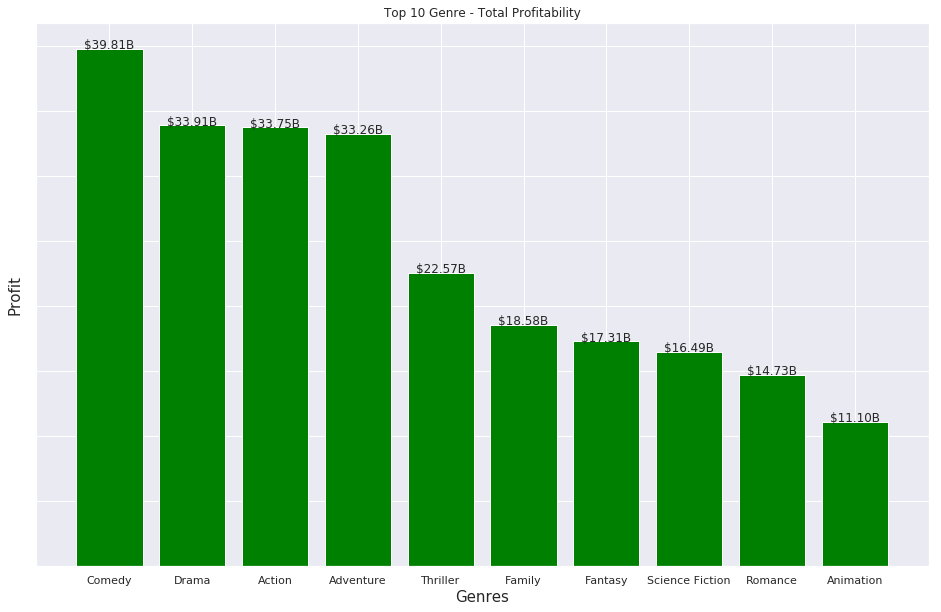

In [44]:
# Building genre total profit bar chart

#making the viz crispier
sns.set()
#setting the size of the graph
plt.rcParams['figure.figsize'] = [16, 10]

#plotting the bar

plt.bar(bar_filter.index, bar_filter['genre_profit'], color = 'green')
ax = plt.gca()
    
# calling the custom function to add value labels
addlabels(bar_filter['genre'], bar_filter['genre_profit'], bar_filter['genre_profit_v2'])
    
# giving title to the plot
plt.title("Top 10 Genre - Total Profitability")
      
# X and Y labels' properties
plt.xlabel("Genres", size = 15)
plt.ylabel("Profit", size = 15)
ax.axes.yaxis.set_ticklabels([])
plt.xticks(bar_filter.index)
ax.axes.xaxis.set_ticklabels(['Comedy', 'Drama', 'Action', 'Adventure', 'Thriller', 'Family', 'Fantasy', 'Science Fiction', 'Romance', 'Animation'])

      
# visualizing the plot
plt.show();


We can see from the Top 10 Genre - Total Profitability bar chart that overall, Comedy is the most profitable genre overshadowing even profit combinations of lower genres such as Animation and Romance. Drama, Action and Adventure are all closely tied in second, third, and fourth place. 

However, what about over time? Has Comedy being a constant winner in the profit race throughout the years? We'll find out with the next chart.

##### Genre Total Profitability Line Chart 

We'll create another subset of the existing dataframe however this time we'll group profit not only by genre, but also by release year:

In [45]:
df_tl_sum = df_genre.groupby(['release_year','genre'], as_index = False)['genre_profit'].sum().sort_values(by = ['release_year','genre_profit'], ascending = False) 

In [46]:
df_tl_sum['genre_profit_v2'] = df_tl_sum['genre_profit'].apply(lambda x: num_abr(x))

In [47]:
df_tl_sum.head(10)

,release_year,genre,genre_profit,genre_profit_v2
1030,2015,Action,3.241908e+09,$3.24B
1031,2015,Adventure,2.837807e+09,$2.84B
1033,2015,Comedy,2.223718e+09,$2.22B
1044,2015,Science Fiction,2.051424e+09,$2.05B
1046,2015,Thriller,1.811890e+09,$1.81B
1036,2015,Drama,1.771887e+09,$1.77B
1037,2015,Family,1.075250e+09,$1.08B
1034,2015,Crime,9.951575e+08,$995.2M
1032,2015,Animation,9.510646e+08,$951.1M
1038,2015,Fantasy,7.028050e+08,$702.8M


In [48]:
# Timeline chart filter for profit amassed each genre/year

g1 = df_tl_sum[df_tl_sum['genre'].isin(['Comedy']) & (df_tl_sum['release_year'] >= 2000)]
g2 = df_tl_sum[df_tl_sum['genre'].isin(['Drama']) & (df_tl_sum['release_year'] >= 2000)]
g3 = df_tl_sum[df_tl_sum['genre'].isin(['Action']) & (df_tl_sum['release_year'] >= 2000)]
g4 = df_tl_sum[df_tl_sum['genre'].isin(['Adventure']) & (df_tl_sum['release_year'] >= 2000)]
g5 = df_tl_sum[df_tl_sum['genre'].isin(['Thriller']) & (df_tl_sum['release_year'] >= 2000)]
g6 = df_tl_sum[df_tl_sum['genre'].isin(['Family']) & (df_tl_sum['release_year'] >= 2000)]
g7 = df_tl_sum[df_tl_sum['genre'].isin(['Fantasy']) & (df_tl_sum['release_year'] >= 2000)]
g8 = df_tl_sum[df_tl_sum['genre'].isin(['Science Fiction']) & (df_tl_sum['release_year'] >= 2000)]
g9 = df_tl_sum[df_tl_sum['genre'].isin(['Romance']) & (df_tl_sum['release_year'] >= 2000)]
g10 = df_tl_sum[df_tl_sum['genre'].isin(['Animation']) & (df_tl_sum['release_year'] >= 2000)]

**rao**: Similar to the bar chart, we're selecting the top 10 genre but we're also filtering it with a specific year range starting from 2000 to 2015. With this, we are now ready to plot our timeline chart:

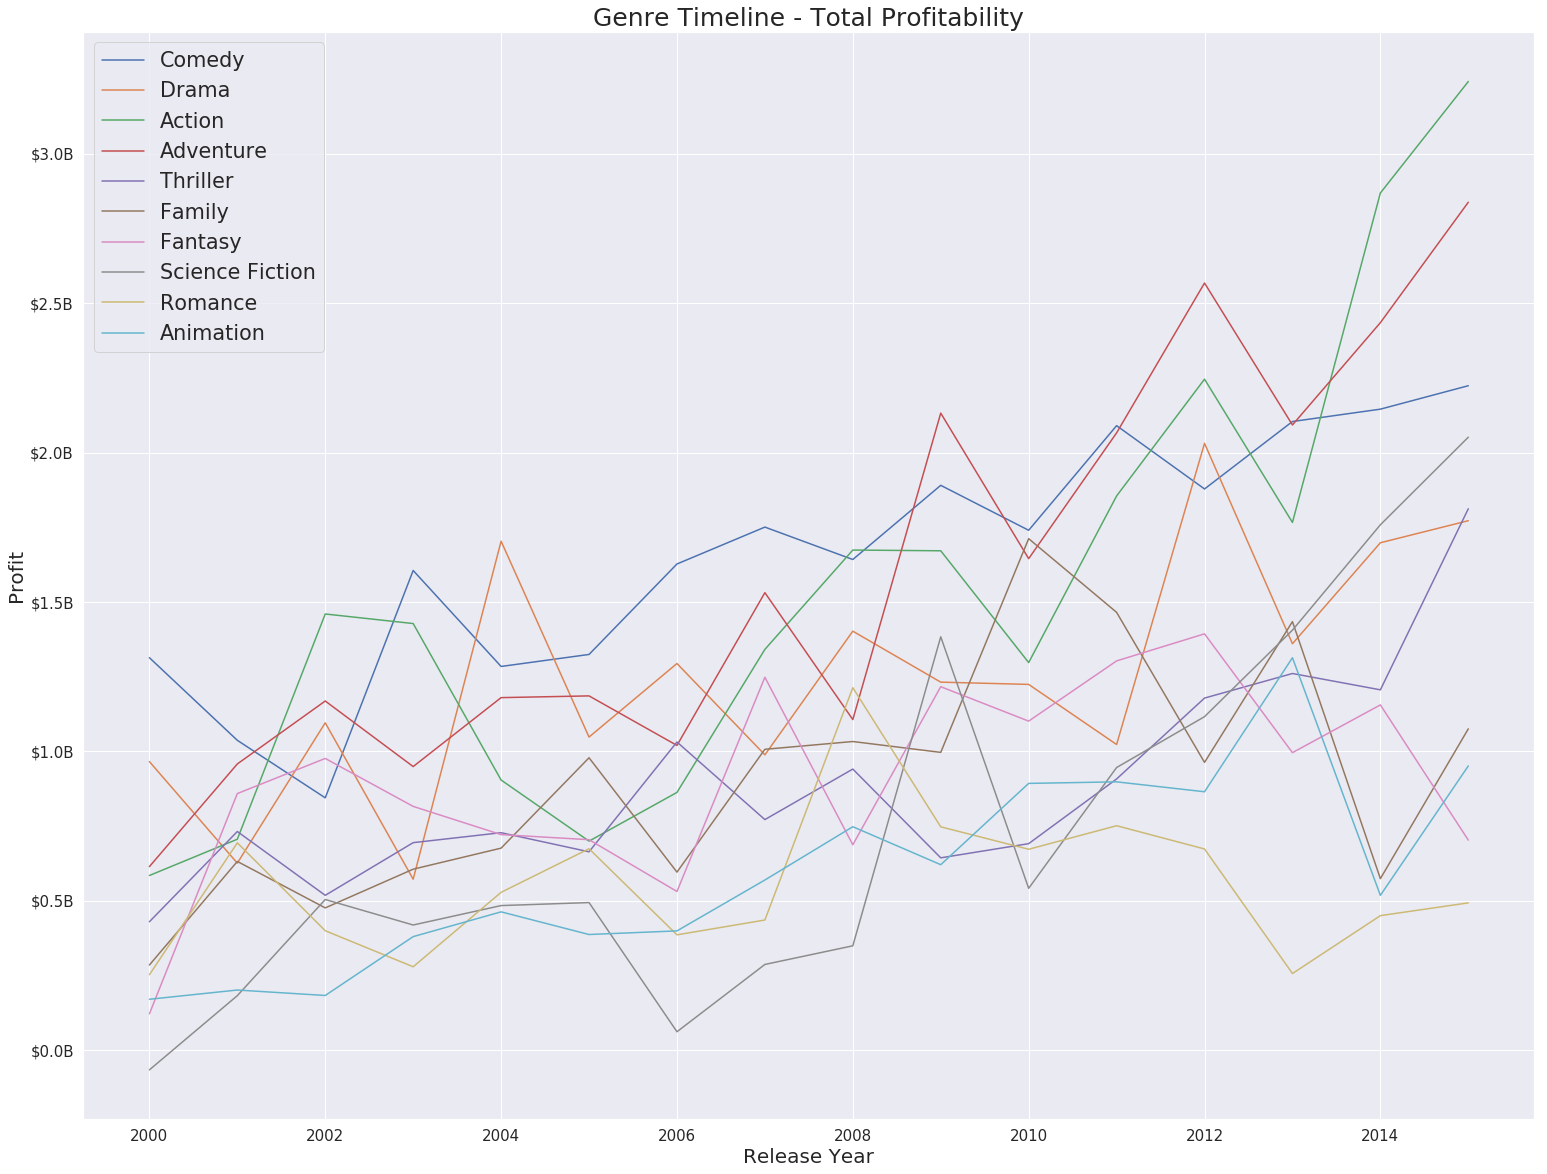

In [49]:
# Building genre timeline chart
sns.set()
plt.rcParams['figure.figsize'] = [26, 20]
ax = plt.gca()

plt.plot(g1['release_year'], g1['genre_profit'], label = 'Comedy')
plt.plot(g2['release_year'], g2['genre_profit'], label = 'Drama')
plt.plot(g3['release_year'], g3['genre_profit'], label = 'Action')
plt.plot(g4['release_year'], g4['genre_profit'], label = 'Adventure')
plt.plot(g5['release_year'], g5['genre_profit'], label = 'Thriller')
plt.plot(g6['release_year'], g6['genre_profit'], label = 'Family')
plt.plot(g7['release_year'], g7['genre_profit'], label = 'Fantasy')
plt.plot(g8['release_year'], g8['genre_profit'], label = 'Science Fiction')
plt.plot(g9['release_year'], g9['genre_profit'], label = 'Romance')
plt.plot(g10['release_year'], g10['genre_profit'], label = 'Animation')

plt.title('Genre Timeline - Total Profitability', size = 25)
plt.xlabel('Release Year', size = 20)
plt.ylabel('Profit', size = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
ax.axes.yaxis.set_ticklabels(["$0B", "$0.0B", "$0.5B", "$1.0B", "$1.5B", "$2.0B", "$2.5B", "$3.0B"])
plt.legend(fontsize = 'xx-large')
plt.show()

The Genre Timeline - Total Profitability chart shows that no genre, not even the most profitable, Comedy, has a constant streak of profit. Even though Comedy was first during 2005 to 2007, afterwards it was eclipsed by Drama, Action and Adventure. With Action and Adventure having a sudden rise in 2015.

Although there is a rise in profit overtime, each genre shows spikes and drops.
Hence, there was no genre with a steady increase, displaying the unstable historical profitability by genre.


#### Production Company

We've discovered the main profit influencers in genre and we'll do the same with the production companies.

Similar to the 'genres' column, we'll distribute the profit by each company after the first "|" in 'production_companies'. We'll use the same custom function from before alongside the other steps from the genre profit distribution process:

In [50]:
# Using lambda expressions to appply our custom function across all records appropiately to count # of companies:
df_movie['pc_count'] = df_movie['production_companies'].apply(lambda x: genre_count(x))

In [51]:
# Create new columns to divide rev/budget/profit by number of companies associated to each particular movie
df_movie['prodcom_profit'] = df_movie['profit'] / df_movie['pc_count']
df_movie['prodcom_rev'] = df_movie['revenue'] / df_movie['pc_count']
df_movie['prodcom_budget'] = df_movie['budget'] / df_movie['pc_count']

In [52]:
df_movie.head(2)

,budget,revenue,original_title,cast,tagline,genres,production_companies,release_year,profit,genre_count,genre_profit,genre_rev,genre_budget,pc_count,prodcom_profit,prodcom_rev,prodcom_budget
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1363528810,4,340882202.5,378382202.5,37500000.0,5,272705762.0,302705762.0,30000000.0
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,What a Lovely Day.,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,228436354,4,57109088.5,94609088.5,37500000.0,2,114218177.0,189218177.0,75000000.0


In [53]:
# 'Explode' identical records if movie contains more than 1 company associated to it
df_prodcom = df_movie.assign(production_companies = df_movie['production_companies'].str.split('|')).explode('production_companies')

In [54]:
# Since we've broken down all production companies as its own record, we'll rename this column accordingly:
df_prodcom.rename(columns = {'production_companies': 'production_company'}, inplace = True)

In [55]:
df_prodcom.head(5)

,budget,revenue,original_title,cast,tagline,genres,production_company,release_year,profit,genre_count,genre_profit,genre_rev,genre_budget,pc_count,prodcom_profit,prodcom_rev,prodcom_budget
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Action|Adventure|Science Fiction|Thriller,Universal Studios,2015,1363528810,4,340882202.5,378382202.5,37500000.0,5,272705762.0,302705762.0,30000000.0
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,2015,1363528810,4,340882202.5,378382202.5,37500000.0,5,272705762.0,302705762.0,30000000.0
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,2015,1363528810,4,340882202.5,378382202.5,37500000.0,5,272705762.0,302705762.0,30000000.0
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,2015,1363528810,4,340882202.5,378382202.5,37500000.0,5,272705762.0,302705762.0,30000000.0
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,Action|Adventure|Science Fiction|Thriller,Dentsu,2015,1363528810,4,340882202.5,378382202.5,37500000.0,5,272705762.0,302705762.0,30000000.0


**raos**: We used the same distribution cleaning process for genre since both fields contained multiple values separated by the | character. Now the production company distribution is cleaner.

We can continue by creating a sub-dataset showcasing the summary of total profit by production company:

In [56]:
df_pcprofit = df_prodcom.groupby(['production_company'], as_index = False)['prodcom_rev', 'prodcom_budget', 'prodcom_profit'].sum().sort_values(by = ['prodcom_profit'], ascending = False).reset_index(drop =True)

In [57]:
# creating extra columns with the custom function to read numerical values easier
df_pcprofit['prodcom_profit_v2'] = df_pcprofit['prodcom_profit'].apply(lambda x: num_abr(x))
df_pcprofit['prodcom_rev_v2'] = df_pcprofit['prodcom_rev'].apply(lambda x: num_abr(x))
df_pcprofit['prodcom_budget_v2'] = df_pcprofit['prodcom_budget'].apply(lambda x: num_abr(x))

In [58]:
df_pcprofit.head(10)

,production_company,prodcom_rev,prodcom_budget,prodcom_profit,prodcom_profit_v2,prodcom_rev_v2,prodcom_budget_v2
0,Paramount Pictures,1.841218e+10,5.570230e+09,1.284195e+10,$12.84B,$18.41B,$5.57B
1,Universal Pictures,1.844200e+10,5.808863e+09,1.263313e+10,$12.63B,$18.44B,$5.81B
2,Warner Bros.,1.819631e+10,6.494378e+09,1.170193e+10,$11.70B,$18.20B,$6.49B
3,Walt Disney Pictures,1.547430e+10,5.149316e+09,1.032499e+10,$10.32B,$15.47B,$5.15B
4,Twentieth Century Fox Film Corporation,1.364403e+10,3.537941e+09,1.010609e+10,$10.11B,$13.64B,$3.54B
5,Columbia Pictures,1.301739e+10,4.878468e+09,8.138918e+09,$8.14B,$13.02B,$4.88B
6,DreamWorks Animation,8.623364e+09,2.607750e+09,6.015614e+09,$6.02B,$8.62B,$2.61B
7,New Line Cinema,8.470221e+09,2.761717e+09,5.708504e+09,$5.71B,$8.47B,$2.76B
8,Marvel Studios,6.972568e+09,1.619333e+09,5.353235e+09,$5.35B,$6.97B,$1.62B
9,Lucasfilm,5.183915e+09,6.115173e+08,4.572398e+09,$4.57B,$5.18B,$611.5M


In [59]:
# we filter to showcase only the top 10 companies
pc_filter = df_pcprofit[df_pcprofit['production_company'].isin(['Paramount Pictures', 'Universal Pictures', 'Warner Bros.', 'Walt Disney Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 'DreamWorks Animation', 'New Line Cinema', 'Marvel Studios', 'Lucasfilm'])]

In [60]:
pc_filter

,production_company,prodcom_rev,prodcom_budget,prodcom_profit,prodcom_profit_v2,prodcom_rev_v2,prodcom_budget_v2
0,Paramount Pictures,1.841218e+10,5.570230e+09,1.284195e+10,$12.84B,$18.41B,$5.57B
1,Universal Pictures,1.844200e+10,5.808863e+09,1.263313e+10,$12.63B,$18.44B,$5.81B
2,Warner Bros.,1.819631e+10,6.494378e+09,1.170193e+10,$11.70B,$18.20B,$6.49B
3,Walt Disney Pictures,1.547430e+10,5.149316e+09,1.032499e+10,$10.32B,$15.47B,$5.15B
4,Twentieth Century Fox Film Corporation,1.364403e+10,3.537941e+09,1.010609e+10,$10.11B,$13.64B,$3.54B
5,Columbia Pictures,1.301739e+10,4.878468e+09,8.138918e+09,$8.14B,$13.02B,$4.88B
6,DreamWorks Animation,8.623364e+09,2.607750e+09,6.015614e+09,$6.02B,$8.62B,$2.61B
7,New Line Cinema,8.470221e+09,2.761717e+09,5.708504e+09,$5.71B,$8.47B,$2.76B
8,Marvel Studios,6.972568e+09,1.619333e+09,5.353235e+09,$5.35B,$6.97B,$1.62B
9,Lucasfilm,5.183915e+09,6.115173e+08,4.572398e+09,$4.57B,$5.18B,$611.5M


Since we've finalized the production company and numerical values distributions, we can start generating our charts:

##### Production Company Total Profitability Bar Chart 

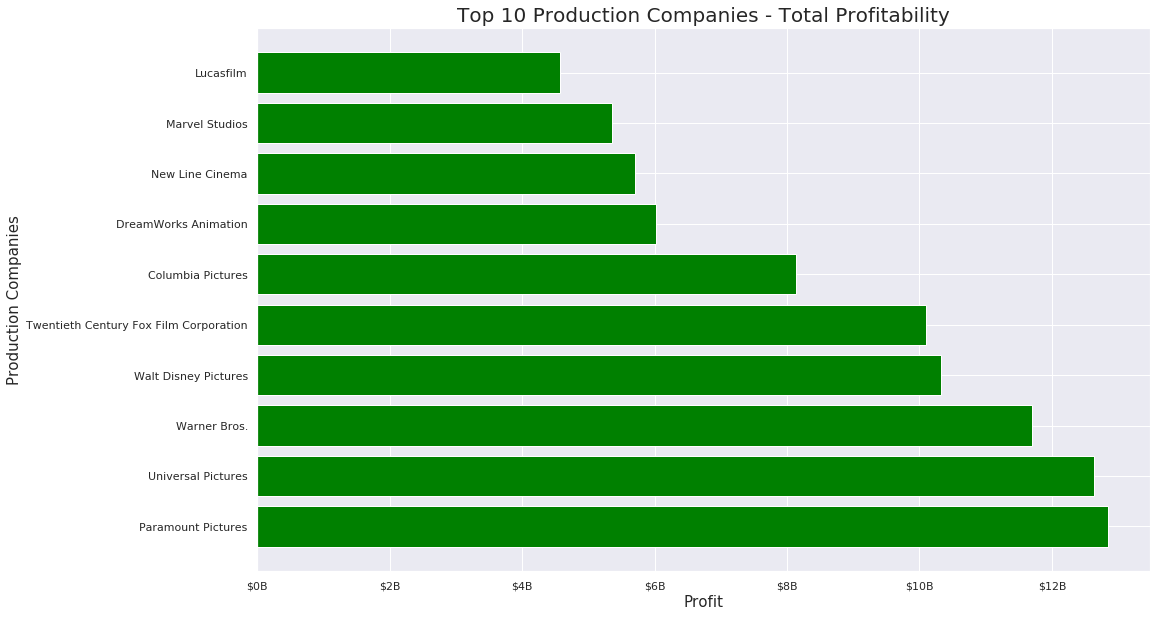

In [61]:
# Building production company total profit bar chart

sns.set()
    
#setting the size of the graph
plt.rcParams['figure.figsize'] = [16, 10]

#plotting the bar

plt.barh(pc_filter.index, pc_filter['prodcom_profit'], color = 'green')
ax = plt.gca()
    
# giving title to the plot
plt.title("Top 10 Production Companies - Total Profitability", size = 20)
      
# X and Y labels' properties
plt.ylabel("Production Companies", size = 15)
plt.xlabel("Profit", size = 15)
ax.axes.xaxis.set_ticklabels(["$0B","$2B", "$4B", "$6B", "$8B", "$10B", "$12B"])
plt.yticks(pc_filter.index)
ax.axes.yaxis.set_ticklabels(['Paramount Pictures', 'Universal Pictures', 'Warner Bros.', 'Walt Disney Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 'DreamWorks Animation', 'New Line Cinema', 'Marvel Studios', 'Lucasfilm'])

      
# visualizing the plot
plt.show();


Both Paramount and Universal have the largest amount of profit amassed while the remaining top contenders are still in the billion benchmark. However, what does the historical data show? We'll do a timeline similar to the genre from the previous section.

##### Production Company Total Profitability Line Chart 

We'll create a timeline dataframe profit summary by both release year and company:

In [62]:
df_tl_pc = df_prodcom.groupby(['release_year','production_company'], as_index = False)['prodcom_profit'].sum().sort_values(by = ['release_year','prodcom_profit'], ascending = False) 

In [63]:
df_tl_pc['prodcom_profit_v2'] = df_tl_pc['prodcom_profit'].apply(lambda x: num_abr(x))

In [64]:
df_tl_pc.head(15)

,release_year,production_company,prodcom_profit,prodcom_profit_v2
15706,2015,Universal Pictures,1.048555e+09,$1.05B
15309,2015,Marvel Studios,7.636141e+08,$763.6M
14859,2015,Bad Robot,7.291921e+08,$729.2M
15279,2015,Lucasfilm,6.295278e+08,$629.5M
15684,2015,Truenorth Productions,6.227261e+08,$622.7M
15009,2015,Dentsu,5.624046e+08,$562.4M
15190,2015,Illumination Entertainment,5.413655e+08,$541.4M
14967,2015,Columbia Pictures,5.375442e+08,$537.5M
15686,2015,Twentieth Century Fox Film Corporation,4.275444e+08,$427.5M
15742,2015,Walt Disney Pictures,4.195830e+08,$419.6M


We'll filter our timeline dataframe to show only the last 15 years for the top 10 companies:

In [65]:
# Timeline chart filter for profit amassed each company/year

pc1 = df_tl_pc[df_tl_pc['production_company'].isin(['Paramount Pictures']) & (df_tl_pc['release_year'] >= 2000)]
pc2 = df_tl_pc[df_tl_pc['production_company'].isin(['Universal Pictures']) & (df_tl_pc['release_year'] >= 2000)]
pc3 = df_tl_pc[df_tl_pc['production_company'].isin(['Warner Bros.']) & (df_tl_pc['release_year'] >= 2000)]
pc4 = df_tl_pc[df_tl_pc['production_company'].isin(['Walt Disney Pictures']) & (df_tl_pc['release_year'] >= 2000)]
pc5 = df_tl_pc[df_tl_pc['production_company'].isin(['Twentieth Century Fox Film Corporation']) & (df_tl_pc['release_year'] >= 2000)]
pc6 = df_tl_pc[df_tl_pc['production_company'].isin(['Columbia Pictures']) & (df_tl_pc['release_year'] >= 2000)]
pc7 = df_tl_pc[df_tl_pc['production_company'].isin(['DreamWorks Animation']) & (df_tl_pc['release_year'] >= 2000)]
pc8 = df_tl_pc[df_tl_pc['production_company'].isin(['New Line Cinema']) & (df_tl_pc['release_year'] >= 2000)]
pc9 = df_tl_pc[df_tl_pc['production_company'].isin(['Marvel Studios']) & (df_tl_pc['release_year'] >= 2000)]
pc10 = df_tl_pc[df_tl_pc['production_company'].isin(['Lucasfilm']) & (df_tl_pc['release_year'] >= 2000)]

**rao**: After preparing our dataframe to have the total profit of the top 10 companies by release year, we can creeate the line chart

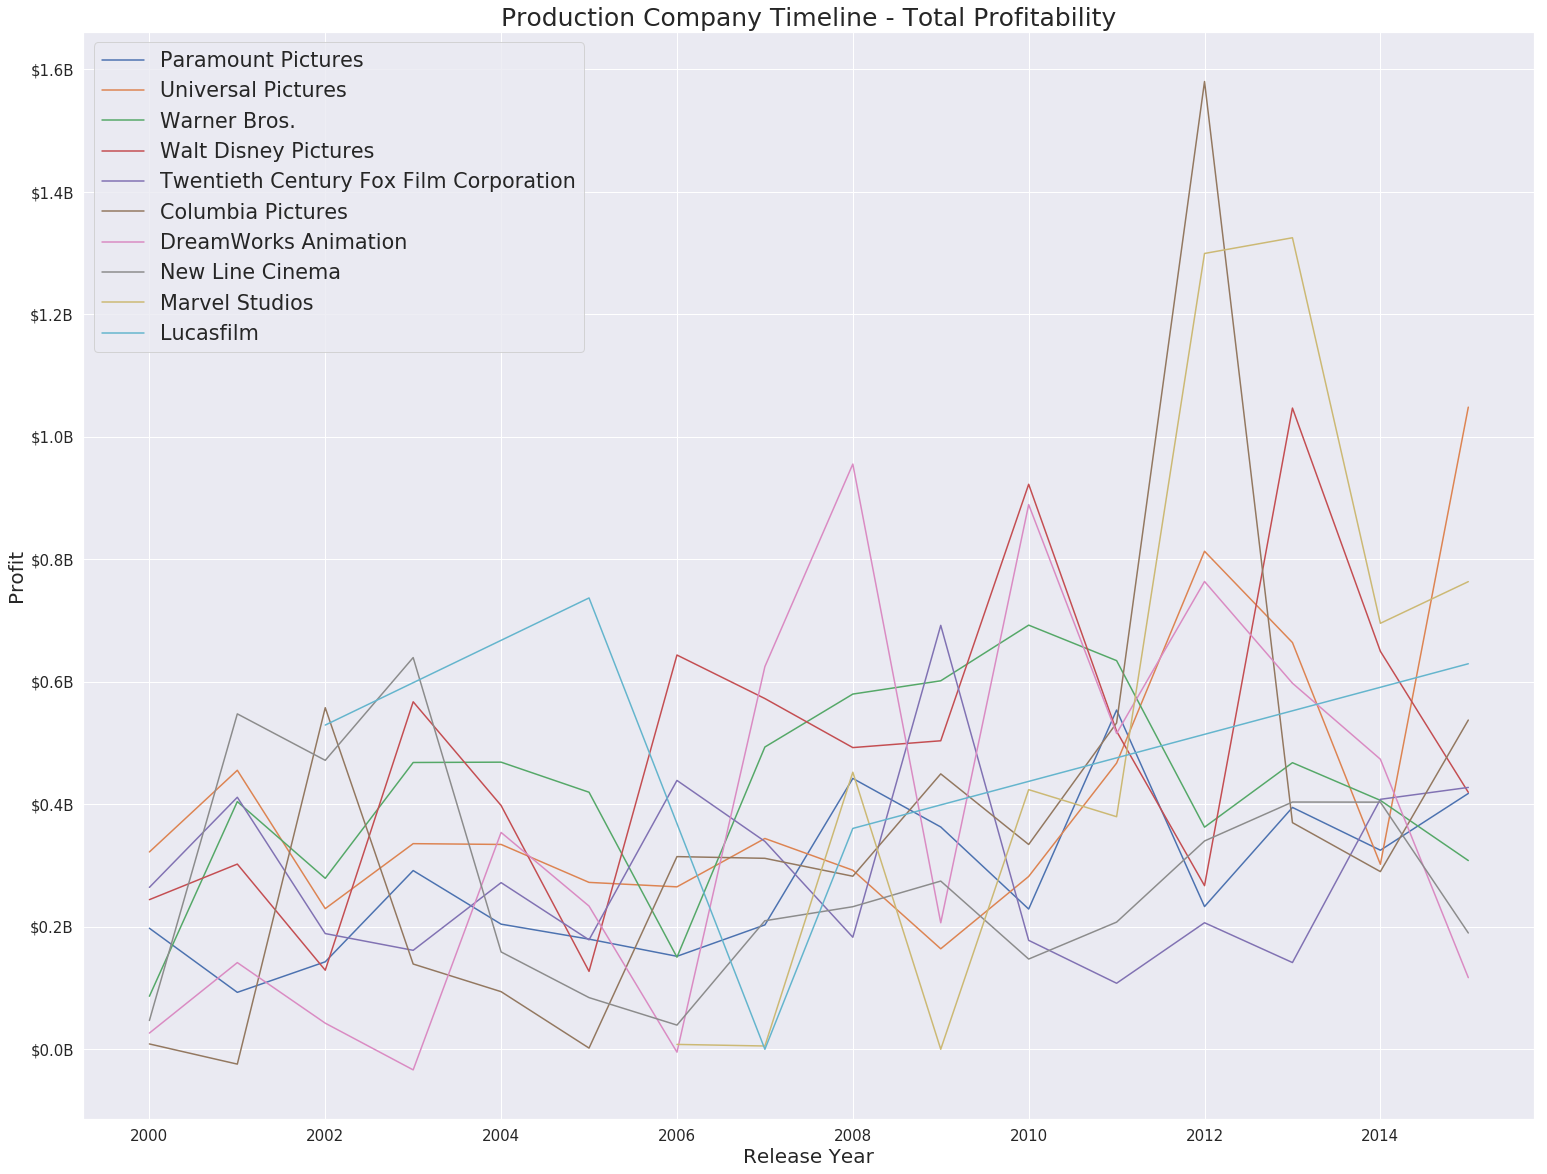

In [66]:
# Building production commpany timeline chart

sns.set()

plt.rcParams['figure.figsize'] = [26, 20]
ax = plt.gca()

#plotting each df as its own line in the plot
plt.plot(pc1['release_year'], pc1['prodcom_profit'], label = 'Paramount Pictures')
plt.plot(pc2['release_year'], pc2['prodcom_profit'], label = 'Universal Pictures')
plt.plot(pc3['release_year'], pc3['prodcom_profit'], label = 'Warner Bros.')
plt.plot(pc4['release_year'], pc4['prodcom_profit'], label = 'Walt Disney Pictures')
plt.plot(pc5['release_year'], pc5['prodcom_profit'], label = 'Twentieth Century Fox Film Corporation')
plt.plot(pc6['release_year'], pc6['prodcom_profit'], label = 'Columbia Pictures')
plt.plot(pc7['release_year'], pc7['prodcom_profit'], label = 'DreamWorks Animation')
plt.plot(pc8['release_year'], pc8['prodcom_profit'], label = 'New Line Cinema')
plt.plot(pc9['release_year'], pc9['prodcom_profit'], label = 'Marvel Studios')
plt.plot(pc10['release_year'], pc10['prodcom_profit'], label = 'Lucasfilm')

plt.title('Production Company Timeline - Total Profitability', size = 25)
plt.xlabel('Release Year', size = 20)
plt.ylabel('Profit', size = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
ax.axes.yaxis.set_ticklabels(["$0B", "$0.0B", "$0.2B", "$0.4B", "$0.6B", "$0.8B", "$1.0B", "$1.2B", "$1.4B", "$1.6B"])
plt.legend(fontsize = 'xx-large')
plt.show()

Although Paramount Pictures amassed the highest profit overall, since the early 2000s it has been overshadowed by multiple companies only obtaining $417M the last year profit was recorded. On the other hand, lower contenders in the Total Profitability bar chart such as Columbia Pictures and Marvel Studios showcase sudden spikes in profit.

We've explored how profit was distributed by genre/production companies but what about revenue and budget? Is there a correlation for what makes a genre profitable? What about production companies? The charts below will answer these questions:

##### Genre - Revenue and Budget Scatterplot 

We'll use the bar_filter dataset once more to analyze the relationship between budget and revenue for genre.

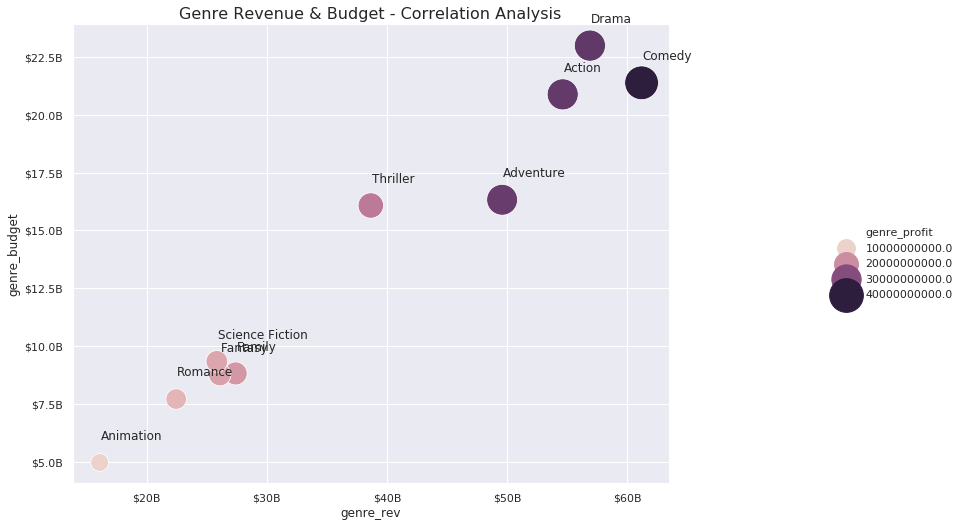

In [67]:
#create seaborn scatterplot showing the 2 variables budget and revenue for genre
#using code understanding from https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9
#using code understanding from https://stackoverflow.com/questions/59953855/seaborn-scatterplot-scale-bubble-size-to-larger-dots

minsize = min(bar_filter['genre_profit']/35000000) #to decrease the billion numerical size of the bubble
maxsize = max(bar_filter['genre_profit']/35000000) #to decrease the billion numerical size of the bubble


sp_profit = sns.relplot(x="genre_rev", y="genre_budget", 
            hue = "genre_profit", size = 'genre_profit', sizes = (minsize, maxsize), data= bar_filter)


# label points on the plot
for x, y, z in zip(bar_filter['genre_rev'], bar_filter['genre_budget'], bar_filter['genre']):
    plt.text(x = x+100000000, y = y+1000000000, s = z) # to place the data labels 

sp_profit.set_yticklabels(['0','$5.0B','$7.5B','$10.0B','$12.5B','$15.0B', '$17.5B', '$20.0B', '$22.5B'])
sp_profit.set_xticklabels(['0','$20B','$30B','$40B','$50B','$60B'])
plt.title("Genre Revenue & Budget - Correlation Analysis", fontsize = 16)

plt.gcf().set_size_inches(15, 8);


Looking at the scatter, there is a positive correlation between revenue and budget. Which means that the higher the budget, the higher the revenue to maximize profit as per the size of the bubbles*. However, there were some exceptions:

- Even though Comedy amassed the highest profit, its budget was lower than Drama's but still attained higher revenue hence more profit
- Thriller and Adventure had both close budget amounts of 16B, but displays a contrast in success with a revenue difference of $10B

**It is important to note that this chart only verifies a positive correlation between the two variables revenue and budget. Although we imply higher budget means higher revenue, there might be other variables affecting this correlation which makes this insight a preliminary analysis that could be examined further.*

In [68]:
# to have a tabular view of the data used for the scatterplot
bar_filter

,genre,genre_rev,genre_budget,genre_profit,genre_profit_v2,genre_rev_v2,genre_budgetv2
0,Comedy,6.119015e+10,2.137870e+10,3.981146e+10,$39.81B,$61.19B,$21.38B
1,Drama,5.689218e+10,2.298499e+10,3.390719e+10,$33.91B,$56.89B,$22.98B
2,Action,5.462667e+10,2.087949e+10,3.374718e+10,$33.75B,$54.63B,$20.88B
3,Adventure,4.958360e+10,1.632639e+10,3.325721e+10,$33.26B,$49.58B,$16.33B
4,Thriller,3.865093e+10,1.607904e+10,2.257189e+10,$22.57B,$38.65B,$16.08B
5,Family,2.740010e+10,8.824875e+09,1.857523e+10,$18.58B,$27.40B,$8.82B
6,Fantasy,2.608452e+10,8.770879e+09,1.731364e+10,$17.31B,$26.08B,$8.77B
7,Science Fiction,2.583646e+10,9.343842e+09,1.649261e+10,$16.49B,$25.84B,$9.34B
8,Romance,2.245078e+10,7.719749e+09,1.473103e+10,$14.73B,$22.45B,$7.72B
9,Animation,1.608350e+10,4.979923e+09,1.110358e+10,$11.10B,$16.08B,$4.98B


##### Production Company - Revenue and Budget Scatterplot 

We'll use the pc_filter dataset once more to analyze the relationship between budget and revenue for production company.

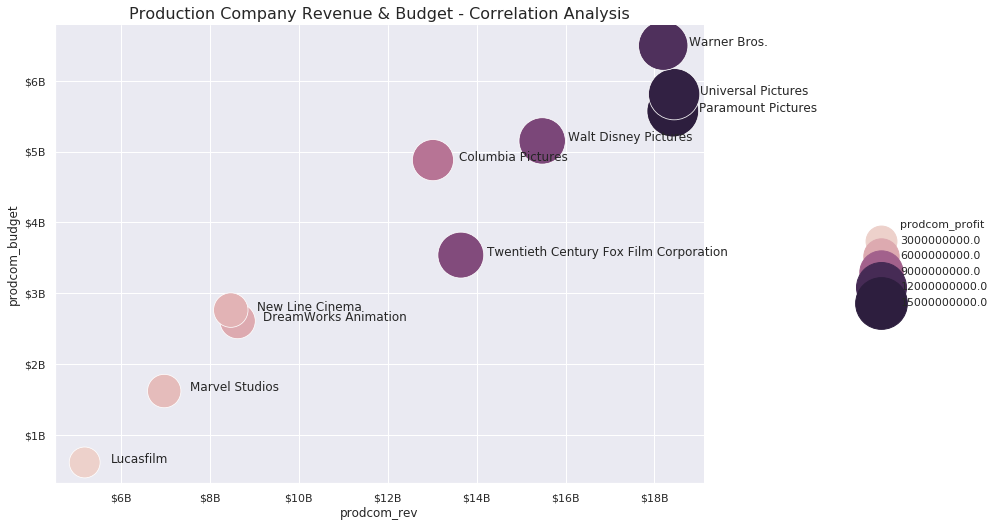

In [69]:
#create seaborn scatterplot showing the 2 variables budget and revenue for production company

minsize = min(pc_filter['prodcom_profit']/4800000) #to decrease the billion numerical size of the bubble
maxsize = max(pc_filter['prodcom_profit']/4800000) #to decrease the billion numerical size of the bubble


sp_profit = sns.relplot(x="prodcom_rev", y="prodcom_budget", 
            hue = "prodcom_profit", size = 'prodcom_profit', sizes = (minsize, maxsize), data= pc_filter)


# label points on the plot
for x, y, z in zip(pc_filter['prodcom_rev'], pc_filter['prodcom_budget'], pc_filter['production_company']):
    plt.text(x = x+580000000, y = y, s = z) # to place the data labels 

sp_profit.set_yticklabels(['0','$1B','$2B','$3B','$4B','$5B', '$6B'])
sp_profit.set_xticklabels(['0','$6B','$8B','$10B','$12B','$14B', '$16B', '$18B'])
plt.title("Production Company Revenue & Budget - Correlation Analysis", fontsize = 16)

plt.gcf().set_size_inches(15, 8);


Similar to the genre scatter analysis, revenue and budget for companies follow the same positive correlation since the increase of one variable leads to the increase of the other. However, the relationship is not as strong with some contradictions evident:
- Columbia had a higher budget than 20th Century Fox but its revenue was 62 million dollars less
- Although Warner Bros had the highest budget, its revenue and consequential profit was lower than both Paramount and Universal Pictures

In [70]:
# to have a tabular view of the data used for the scatterplot
pc_filter

,production_company,prodcom_rev,prodcom_budget,prodcom_profit,prodcom_profit_v2,prodcom_rev_v2,prodcom_budget_v2
0,Paramount Pictures,1.841218e+10,5.570230e+09,1.284195e+10,$12.84B,$18.41B,$5.57B
1,Universal Pictures,1.844200e+10,5.808863e+09,1.263313e+10,$12.63B,$18.44B,$5.81B
2,Warner Bros.,1.819631e+10,6.494378e+09,1.170193e+10,$11.70B,$18.20B,$6.49B
3,Walt Disney Pictures,1.547430e+10,5.149316e+09,1.032499e+10,$10.32B,$15.47B,$5.15B
4,Twentieth Century Fox Film Corporation,1.364403e+10,3.537941e+09,1.010609e+10,$10.11B,$13.64B,$3.54B
5,Columbia Pictures,1.301739e+10,4.878468e+09,8.138918e+09,$8.14B,$13.02B,$4.88B
6,DreamWorks Animation,8.623364e+09,2.607750e+09,6.015614e+09,$6.02B,$8.62B,$2.61B
7,New Line Cinema,8.470221e+09,2.761717e+09,5.708504e+09,$5.71B,$8.47B,$2.76B
8,Marvel Studios,6.972568e+09,1.619333e+09,5.353235e+09,$5.35B,$6.97B,$1.62B
9,Lucasfilm,5.183915e+09,6.115173e+08,4.572398e+09,$4.57B,$5.18B,$611.5M


<a id='conclusions'></a>
## Conclusions

In conclusion, we explored profitability through the lenses of both genre and production companies. We identified the highest performers for both: Comedy and Paramount Pictures. However, in terms of consistency, they've been unpredictable in the last 15 years. Comedy was eclipsed by top genres such as Action and Adventure whereas Paramount was heavily underperforming; barely making it top 6 in the last years.

We also discovered that budget and revenue had a positive relationship while taking into consideration the nuances of the distribution of those values and profit with the number of genres/companies associated to each movie.

It would be interesting to note other factors that may influence profitability such as additional costs. More research would also need to be done in terms of the correlation analyses presented since only 2 variables were explored rather than the whole dataset.

Although the dataset was cleaned thoroughly and the data was explored efficiently, there were some limitations with the analysis:

> **Limitation 1**: The analysis focused only on highest profitability (top 10); a comparison with lowest profitability (bottom 10) or more genres/companies was not explored. 

> **Limitation 2**: The analysis focused on total profitability (sum of profit) rather than average profitability which could unearth other insights not explored in this project.

> **Limitation 3**: The analysis distributed profit/revenue/budget equally between the number of genres or companies. Thus, any comparison between genres/companies is only accurate if those values were distributed equally in the real world.

> **Limitation 4**: The profit metric was calculated with limited factors (budget and revenue) but it doesn't include additional costs past the budget limit a movie could of incurred during production. Hence, it can be argued that the profit data is incomplete.

In [71]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0